In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.metrics import mean_squared_error
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, ConfusionMatrixDisplay

##  Данные

In [13]:
df = pd.read_csv('Heart_disease_statlog.csv')
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [15]:
columns_imp = ['trestbps','chol','thalach','age']

#добавление 10% пропусков
missing_prob = 0.1

for col in columns_imp:
    mask = np.random.random(len(df)) < missing_prob
    df.loc[mask, col] = 0

(216, 13)
(216, 13)
Accuracy on the test set: 0.87
Confusion matrix:
 [[30  3]
 [ 4 17]]


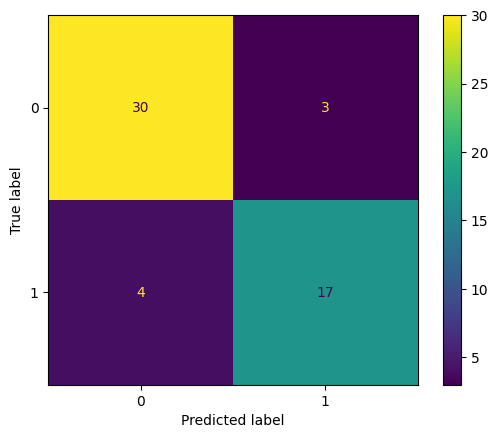

In [16]:
X = df.drop(columns=['target'])
Y = df['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=11)
scaler = StandardScaler()
print(X_train.shape)
X_train = scaler.fit_transform(X_train)
print(X_train.shape)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print('Accuracy on the test set: %.2f' % accuracy_score(Y_test, Y_pred))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred))
disp.plot()
plt.show()

In [17]:
for col in columns_imp:
    print(col)
    print('Values 0:', repr(df[df[col] == 0].shape[0]))
    print('Values 0:', round(int(repr(df[df[col] == 0].shape[0]))/768*100,2))
    print(df[df[col] == 0].groupby('target')['target'].count())
    print('-'*50)

trestbps
Values 0: 32
Values 0: 4.17
target
0    16
1    16
Name: target, dtype: int64
--------------------------------------------------
chol
Values 0: 26
Values 0: 3.39
target
0    12
1    14
Name: target, dtype: int64
--------------------------------------------------
thalach
Values 0: 27
Values 0: 3.52
target
0    12
1    15
Name: target, dtype: int64
--------------------------------------------------
age
Values 0: 27
Values 0: 3.52
target
0    13
1    14
Name: target, dtype: int64
--------------------------------------------------


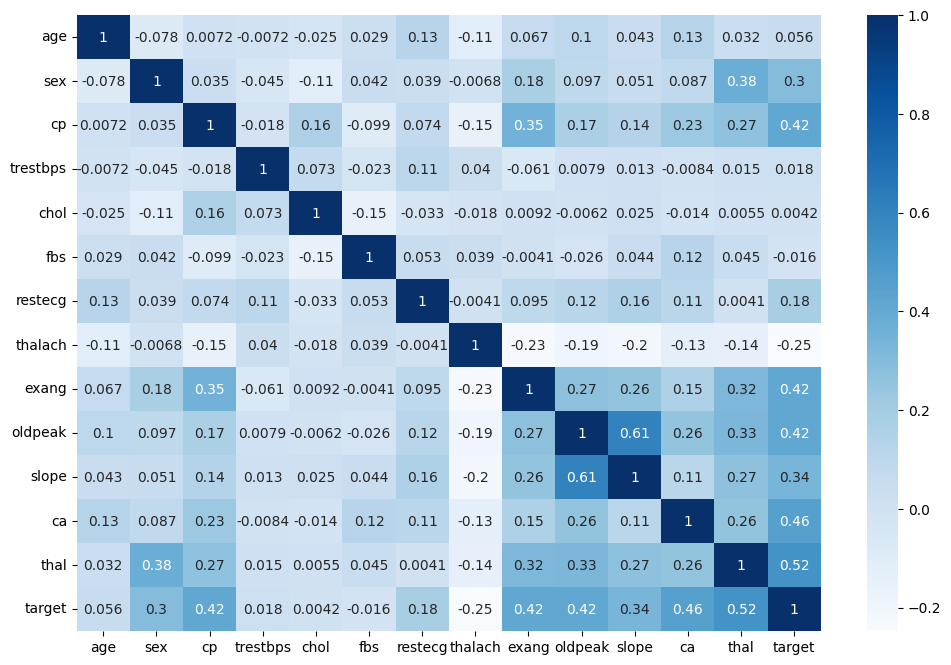

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues);

In [19]:
cols_use = ['age','sex','trestbps','chol','thalach','oldpeak','target']

<ipython-input-20-d8fc450319bf>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-20-d8fc450319bf>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-20-d8fc450319bf>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

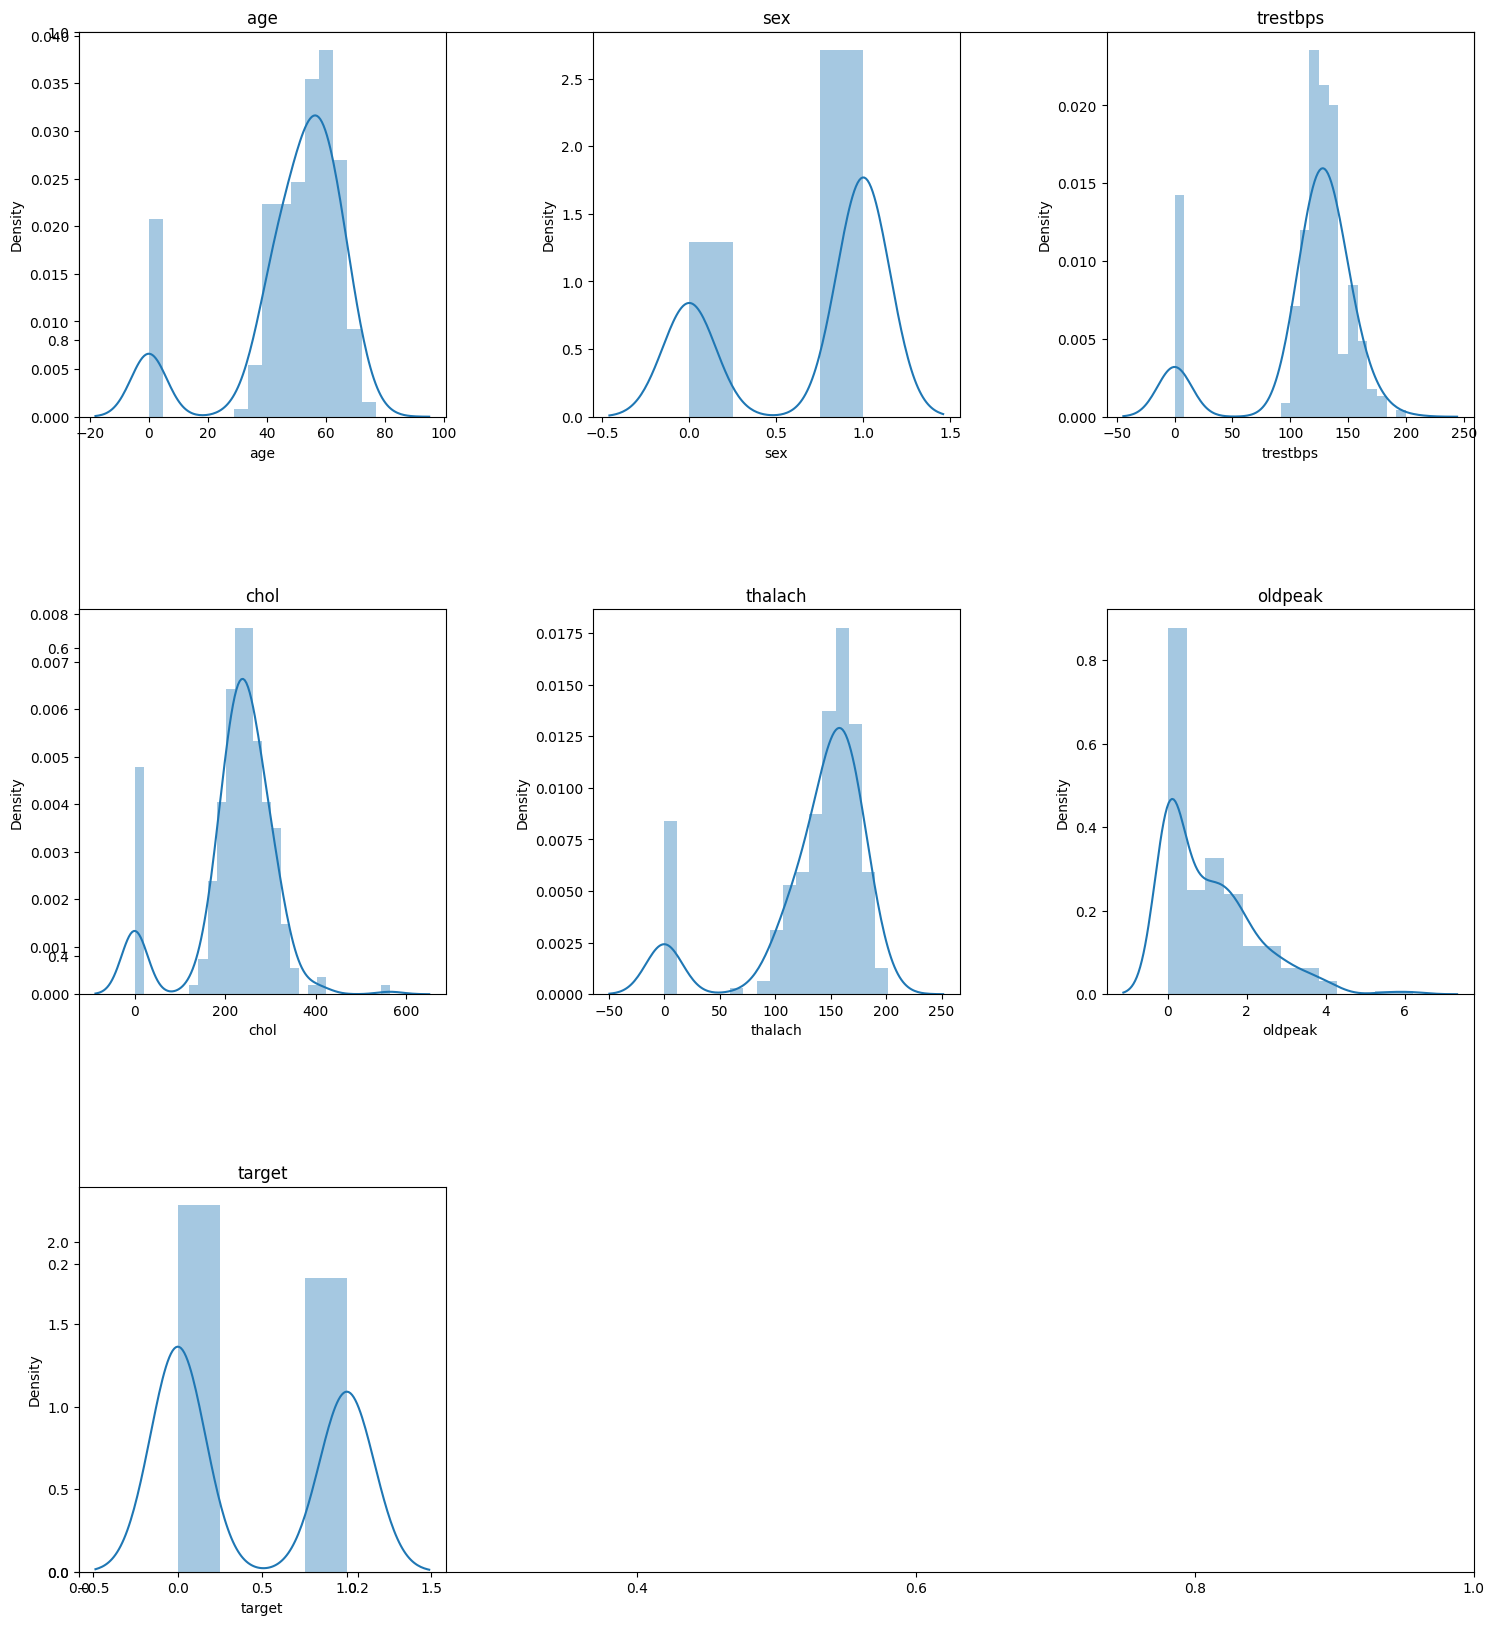

In [20]:
columns = cols_use
plt.subplots(figsize=(18,20))
length = len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length//2), 3, j+1)
    plt.subplots_adjust(wspace=.4, hspace=.5)
    sns.distplot(df[i])
    plt.title(i)
plt.show()

,0
age,"Axes(0.125,0.53;0.168478x0.35)"
sex,"Axes(0.327174,0.53;0.168478x0.35)"
trestbps,"Axes(0.529348,0.53;0.168478x0.35)"
chol,"Axes(0.731522,0.53;0.168478x0.35)"
thalach,"Axes(0.125,0.11;0.168478x0.35)"
oldpeak,"Axes(0.327174,0.11;0.168478x0.35)"
target,"Axes(0.529348,0.11;0.168478x0.35)"


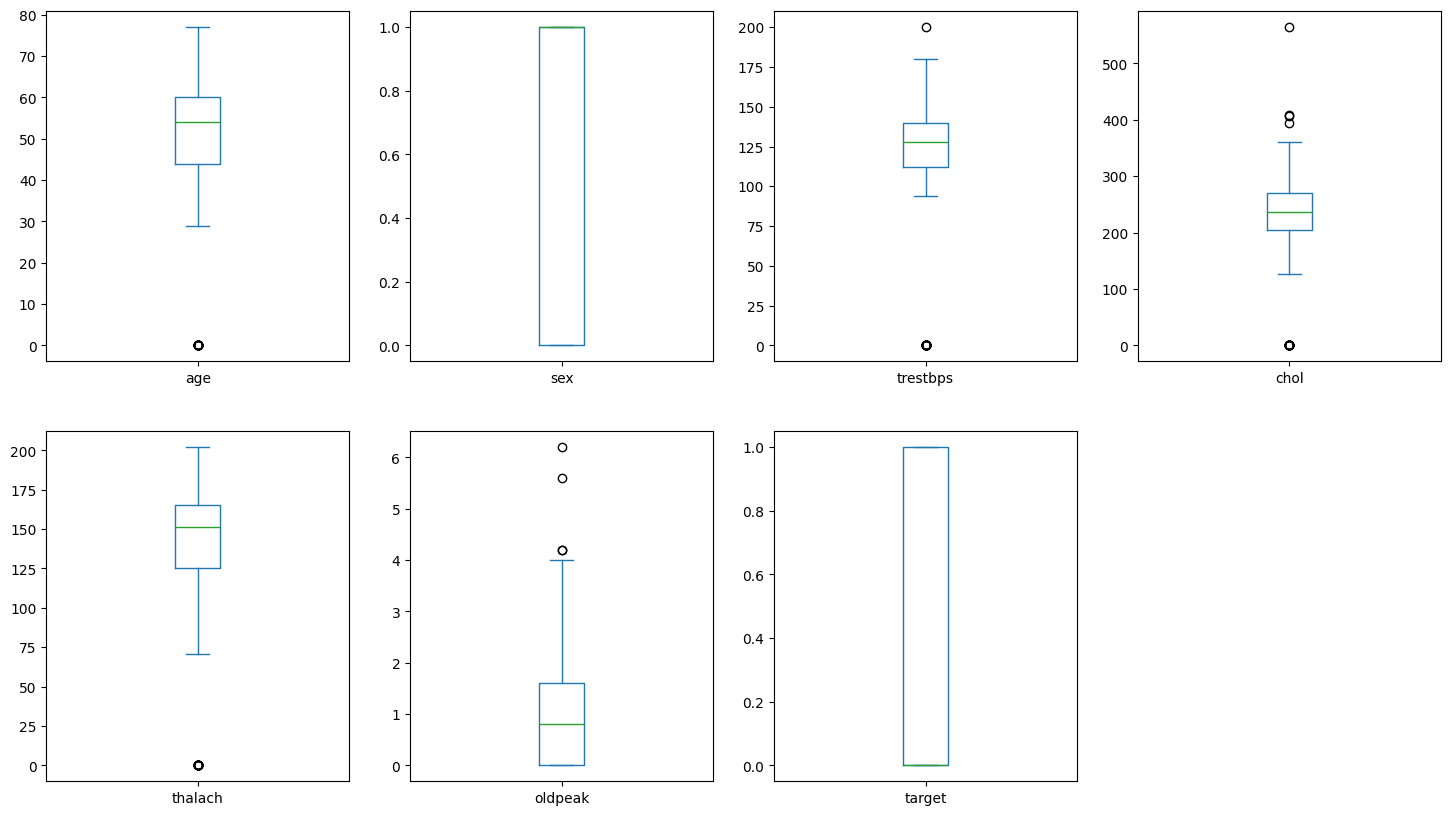

In [21]:
cols_use = ['age','sex','trestbps','chol','thalach','oldpeak','target']
df_box = df[cols_use]
df_box.plot(kind='box', subplots=True, layout=(2, 4), figsize=(18,10))

## SimpleImputer

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
new_df = df.copy()
cols = columns_imp
for col in cols:
    new_df[col] = new_df[col].apply(lambda x: 'NaN' if x == 0 else x)
#setting strategy to 'constant'
mean_imputer = SimpleImputer(strategy='mean') #strategy = mean, median, most_frequent
new_df.iloc[:,:] = mean_imputer.fit_transform(new_df)

<ipython-input-24-0903efc7ba5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[i])
<ipython-input-24-0903efc7ba5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[i])
<ipython-input-24-0903efc7ba5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

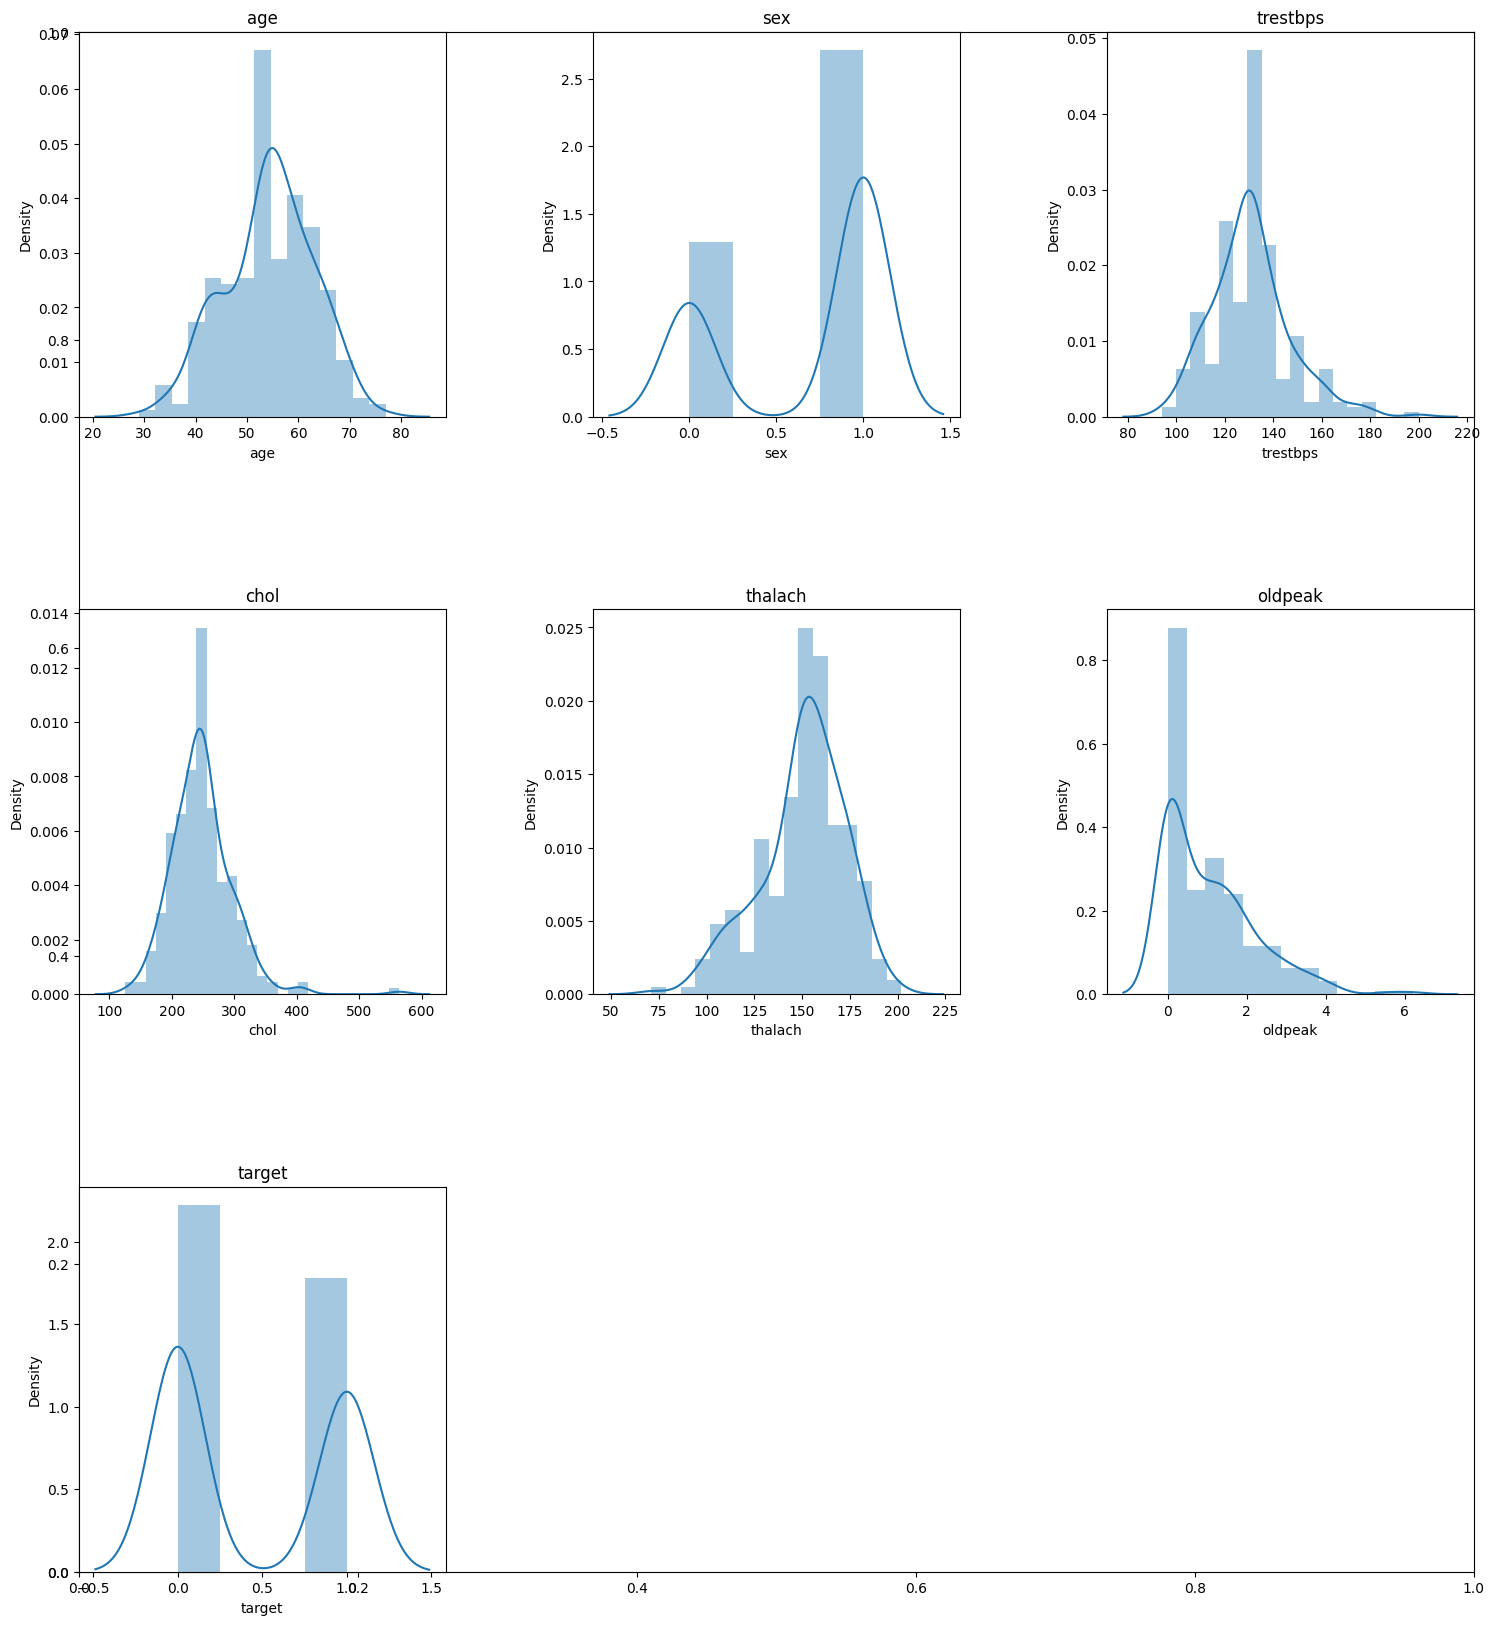

In [24]:
columns = cols_use
plt.subplots(figsize=(18,20))
length = len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length//2), 3, j+1)
    plt.subplots_adjust(wspace=.4, hspace=.5)
    sns.distplot(new_df[i])
    plt.title(i)
plt.show()

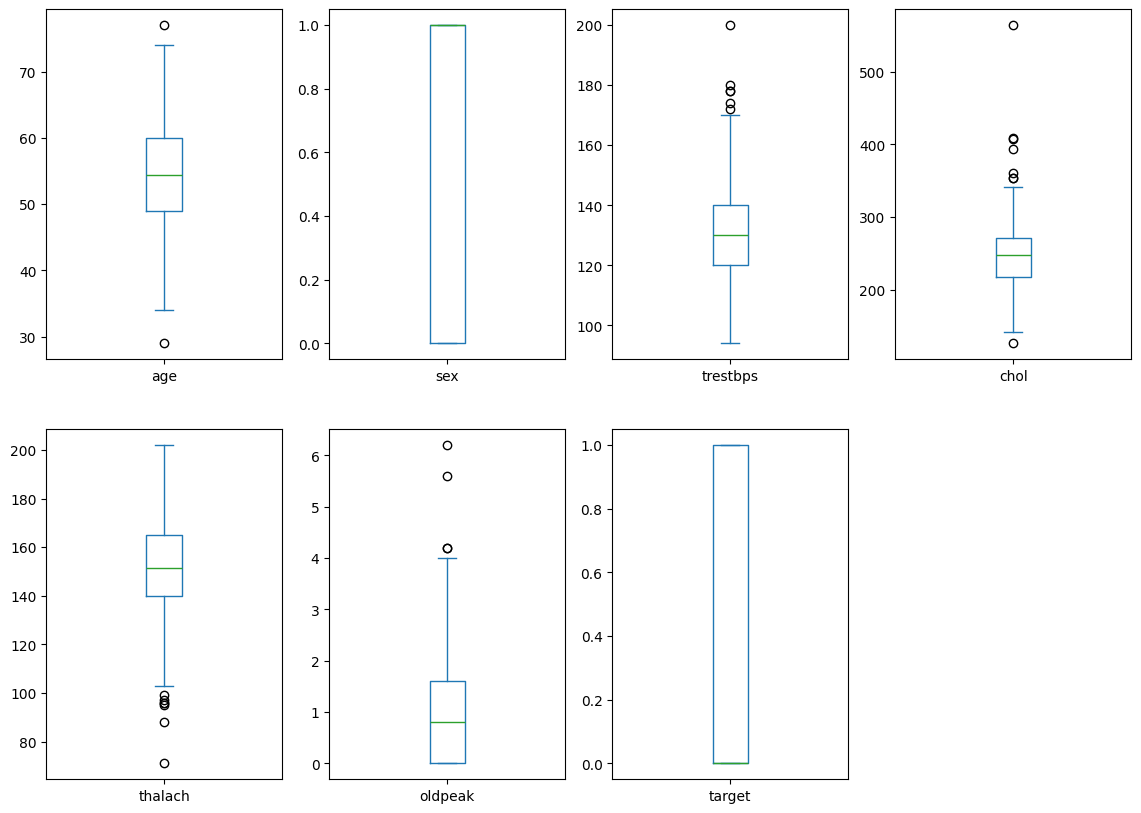

In [25]:
new_df_box = new_df[cols_use]
new_df_box = new_df_box.apply(pd.to_numeric, errors='coerce')
new_df_box.plot(kind='box', subplots=True, layout=(2,4), figsize=(14,10));

(216, 14)
(216, 14)
Accuracy on the test set: 1.00
Confusion matrix:
 [[33  0]
 [ 0 21]]


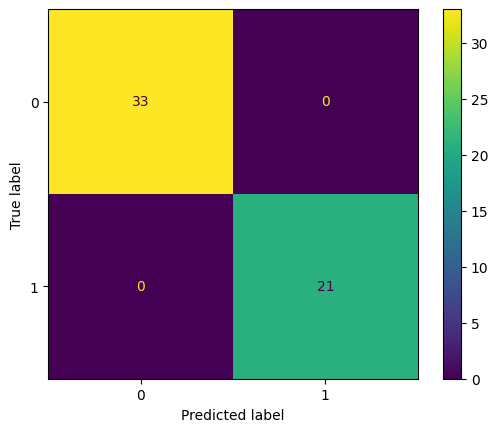

In [26]:
X = new_df
Y = df['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=11)
scaler = StandardScaler()
print(X_train.shape)
X_train = scaler.fit_transform(X_train)
print(X_train.shape)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print('Accuracy on the test set: %.2f' % accuracy_score(Y_test, Y_pred))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred))
disp.plot()
plt.show()

## IterativeImputer

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
myImputer=IterativeImputer()
new_df = df.copy()
for col in columns_imp:
    new_df[col] = new_df[col].apply(lambda x: 'NaN' if x == 0 else x)
myImputer.fit(new_df)
new_df = myImputer.transform(new_df)
new_df = pd.DataFrame(new_df,columns = df.columns)

<ipython-input-28-0903efc7ba5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[i])
<ipython-input-28-0903efc7ba5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[i])
<ipython-input-28-0903efc7ba5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

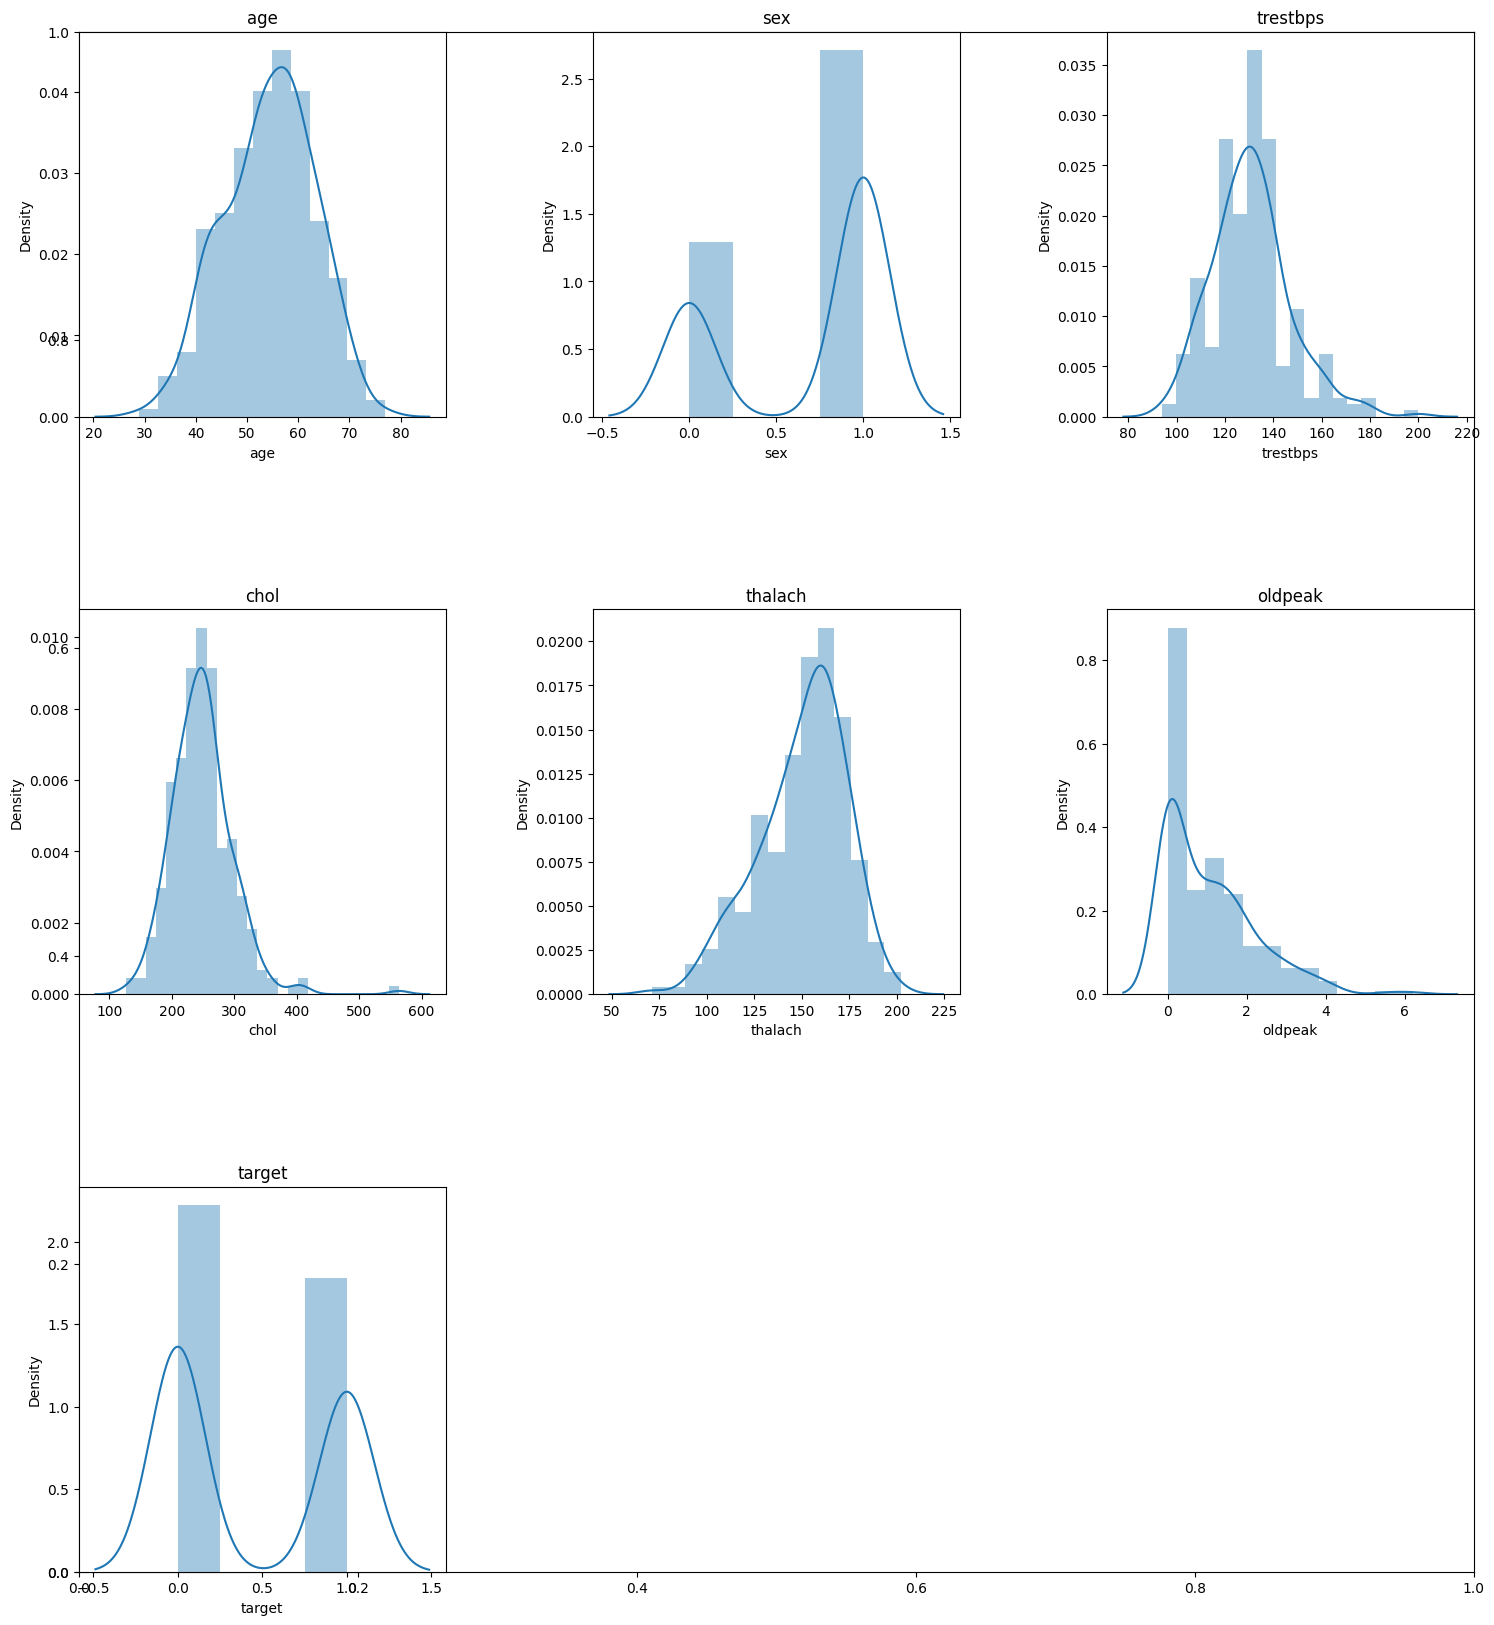

In [28]:
columns = cols_use
plt.subplots(figsize=(18,20))
length = len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length//2), 3, j+1)
    plt.subplots_adjust(wspace=.4, hspace=.5)
    sns.distplot(new_df[i])
    plt.title(i)
plt.show()

(216, 14)
(216, 14)
Accuracy on the test set: 1.00
Confusion matrix:
 [[33  0]
 [ 0 21]]


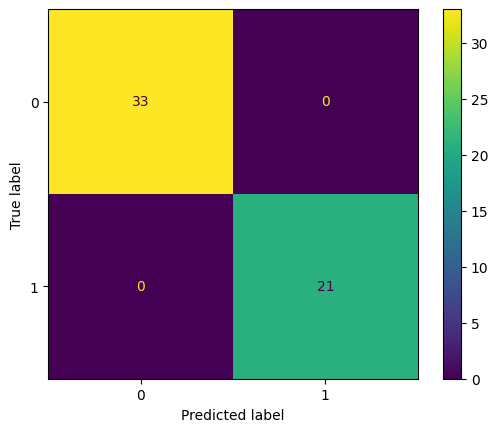

In [29]:
X = new_df
Y = df['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=11)
scaler = StandardScaler()
print(X_train.shape)
X_train = scaler.fit_transform(X_train)
print(X_train.shape)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print('Accuracy on the test set: %.2f' % accuracy_score(Y_test, Y_pred))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred))
disp.plot()
plt.show()

## KNNImputer

In [30]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=20)
new_df = df.copy()
for col in columns_imp:
    new_df[col] = new_df[col].apply(lambda x: 'NaN' if x == 0 else x)
imputer.fit(new_df)
new_df = imputer.transform(df)
new_df = pd.DataFrame(new_df,columns = df.columns)

<ipython-input-31-0903efc7ba5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[i])
<ipython-input-31-0903efc7ba5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[i])
<ipython-input-31-0903efc7ba5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

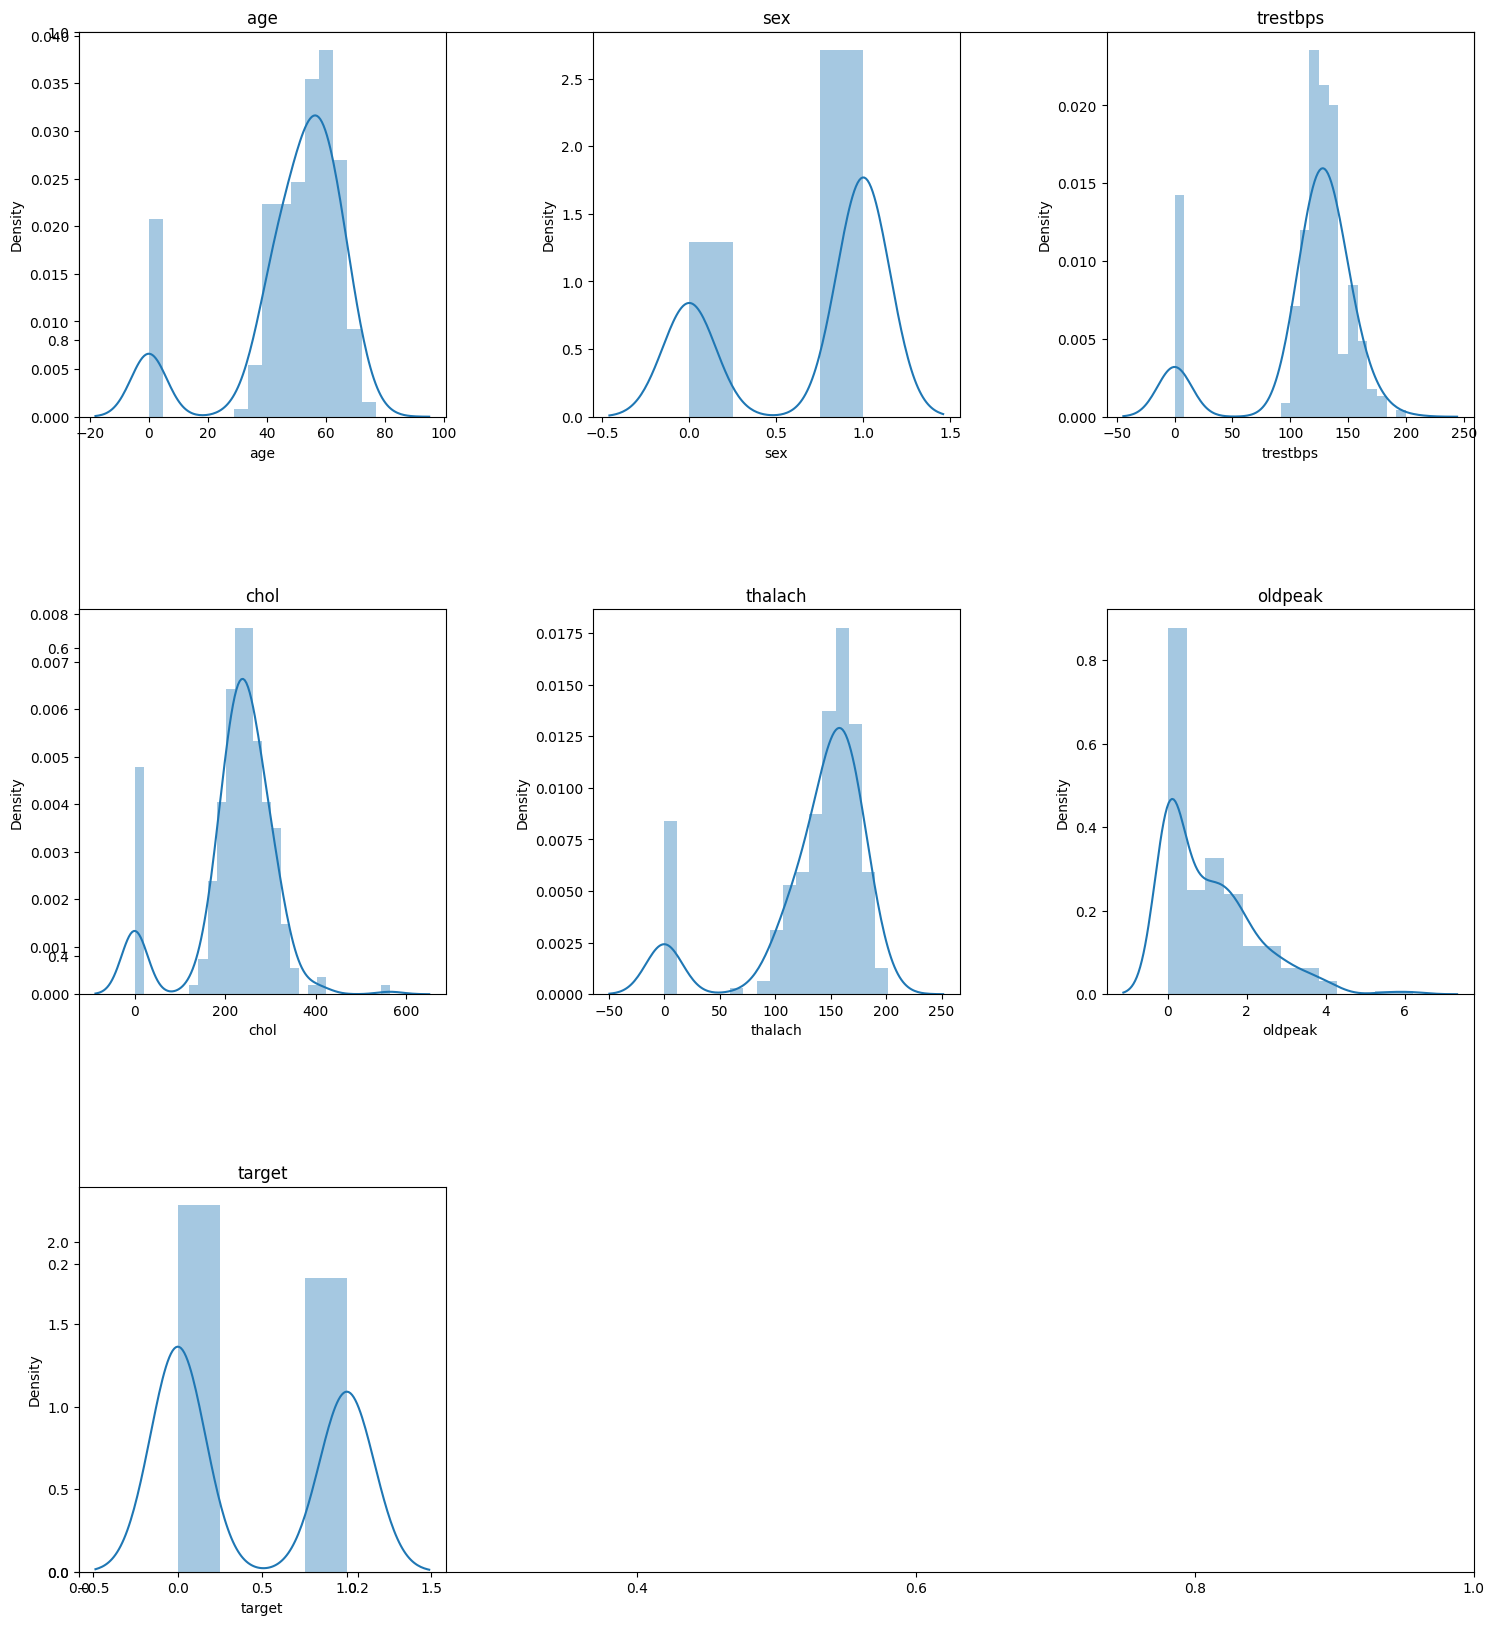

In [31]:
columns = cols_use
plt.subplots(figsize=(18,20))
length = len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length//2), 3, j+1)
    plt.subplots_adjust(wspace=.4, hspace=.5)
    sns.distplot(new_df[i])
    plt.title(i)
plt.show()

(216, 14)
(216, 14)
Accuracy on the test set: 1.00
Confusion matrix:
 [[33  0]
 [ 0 21]]


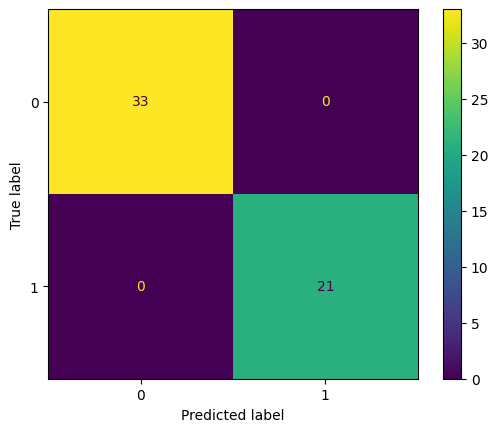

In [32]:
X = new_df
Y = df['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=11)
scaler = StandardScaler()
print(X_train.shape)
X_train = scaler.fit_transform(X_train)
print(X_train.shape)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print('Accuracy on the test set: %.2f' % accuracy_score(Y_test, Y_pred))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred))
disp.plot()
plt.show()